 # Broadband scattering suppression using 3D nano-assembled plasmonic meta-structure: [Plasmonic Cloaking](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-28-15-22732&id=433552)

## Introduction

How can we make an object invisible? The concept of "cloaking" is particularly attractive in the visible (VIS) and near infra-red (NIR) spectrum. This notebook explores a promising approach: using the plasmonic properties of metallic nanoparticles to suppress light scattering.

Based on our paper, ["Modeling broadband cloaking using 3D nano-assembled plasmonic meta-structures"](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-28-15-22732&id=433552), we present a multiscale simulation platform. This model realistically simulates light interaction with a core-shell structure, where a homogeneous core is cloaked by a shell of gold nanoparticles (AuNPs).

In this notebook, I will:

* Implement the core computational model combining Foldy-Lax multiple scattering theory with the method of fundamental solutions.

* Simulate the scattering cross-sections for various core sizes and shell configurations.

* Visualize the key finding: a scattering suppression of up to 50% in the 400-600 nm range for cores as large as 900 nm in diameter.

The results demonstrate that a suitable combination of AuNP size and shell filling fraction can create an effective plasmonic cloak.

## Table of Contents

- [Model](#model)

    - [Problem Statement](#problem-statement)

    - [Solution method](#solution-method)

- [Computing Functions](#computing-functions)
- [Conclusion - Key Points](#conclusion--key-points)



## Model
Invisibility at the nano-scale can be achieved by suppressing scattering from a target object. In other words, an object that is not detected by a sensor is invisible for all practical purposes. 


### Problem Statement

A plane wave with wavelength $\lambda$ propagates in the $+\hat{z}$ direction and is incident on a
structure consisting of a dielectric sphere with radius $a_{0}$ surrounded
by $N$ small, metal nanoparticles. The metal nanoparticles may be
situated at subwavelength distances away from the surface of the
dielectric sphere. Hence, the field scattered by this structure is the
result of strong multiple scattering interactions between each and all
of the components of the structure. In what follows, this notebook shows a
method to compute the field scattered by this structure. For
simplicity, we describe the problem for scalar waves. In particular, we use the method of fundamental solutions
to compute scattering by the dielectric sphere and the Foldy-Lax equations to model the multiple scattering by
the point particles that surround the sphere.



### Solution method

**Modeling Assumptions:**

* Metallic nanopparticles in the shell are assumed as point scatterer.

* A point scatterer has isotropic scattering pattern.

* Extinction properties of a point scatterer was attributed to a parameter, $\alpha$, known as strength parameter as well. $\alpha = [\frac{\sigma_{s}}{4\pi}-(\frac{k_{0}\sigma_{t}}{4\pi})]^{1/2} +\frac{ik_{0}\sigma_{t}}{4\pi}$ 

* $\sigma_{t} = \sigma_{s}+\sigma_{a}$, total cross-section of a point scatterer.

* The scattering ($\sigma_{s}$) and the absorption ($\sigma_{a}$) cross-sections were computed using Rayleigh Scatterig theory. 

**Computational method:**

* Interaction of the monochromatic light with the dielectric core was computed using Methods of Fundamentals of Solutions(MFS). 

* Multiple scattering and absorption by the nanoparticles in the shell and the core was computed using generalized Foldy-Lax scattering theory following a modification.

* Total scattered power by the meta-strucutre was computed using the Optical Theorem $\sigma_{t}=\frac{4\pi}{k_{0}}Im[f(\hat{o},\hat{i})]$

Detailed computational method has been described in the [publication](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-28-15-22732&id=433552).


## Computing Functions
Computing functions in this simulation has been divided into two modules. 

1. **Geometry**
    * Coordinates(CoreDia, NPDia, Vff): Spherical Silica diameter (CoreDia),
    Nanoparticles diameter(NPDia), and shell volume filling fractions (Vff). Then, this function populates the shell( thickness same as the Nanoparticle diameter) with randomly generated nanoparticles. Returns the coordinates of the Nanoparticles as output(R_N). 

    *  RayleighAlpha(R, WL, n, K): Takes input as Nanoparticles radius(R), Wavelength(WL), Nanoparticles refractive index(n), and nanoparticles extinction coefficients (k). Returns $\alpha$ . Rayleigh scattering method was used for the calutation.

2. **Mfs**

    * ComputeG( k, Rd ): This function computes the whole space Green's function given a wavenumber k and a distance Rd. The output of this function is the evaluation of the whole space Green's function.

    * ComputeDνG( k, Rd, CosTheta ): This function computes the normal derivative of the whole space Green's function 
    given a wavenumber k, a distance Rd, and the cosine of the angle made between the difference vector and the unit normal. The output of this function is the evaluation of the normal derivative of the whole space Green's function.

    * ComputeExpansionCoefficientsExcitingFields( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, α, R_N, M, N ): Computes the MFS expansion coefficients and Foldy-Lax exciting fields.

    * ComputeMFSPoints( a0, M ): This function computes the set of points needed for the method of fundamental solutions (MFS).
    In particular, given the radius of a sphere, a0, and the number of points M, this function computes
    the Fibonnaci lattice on the unit sphere and stores them as the unit normal vectors ν. Using ν, we
    then compute ρ_bdy = a0 * ν, ρ_int = ( a0 + ℓ ) * ν, and ρ_ext = ( a0 - ℓ ) * ν. This function outputs four vectors: ν, ρ_bdy, ρ_int, and ρ_ext.

    * ComputeMFSExpansionCoefficients( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, M ): This function solves the 2M x 2M system of equations for the MFS expansion coefficients. This code requires the results from ComputeMFSPoints, namely ν, ρ_bdy, ρ_int, and ρ_ext, in addition to the two wavenumbers k0 and k1, the sphere radius, a0, and the number of MFS points, M. The output from this code are the 2 M-vectors, c_int and c_sca, corresponding to the MFS expansions for the interior and scattered fields, respectively.

    * ComputeTotalCrossSection( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, α, R_N, M, N ): This function computes the total scattering cross-section of dielectric and surrunded plasmonic nanoparticles by evaluating the Optical Theorem using the results from the MFS approximation for the scattered field.

    * ComputeTotalCrossSectionMFS( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, M ): This function computes the total scattering cross-section of dielectric core only by evaluating the Optical Theorem using the results from the MFS approximation for the scattered field.


Optical constants such as refractive index and extinction coefficient from experimentally verified sources were used. This simulation runs for the whole visible wavelength range ($400 nm$ to $750nm$). It can take a significant amount of time and resources if you have a higher filling fraction (~$Vff >= 0.20$ or more than 20%). At a higher filling fraction $Vff\approx 0.3$ you would see scattering suppression up to ~$650nm$  




### Citation
If you use this notebook, please cite:

Imran Khan *et al.*, “Plasmonic cloaking of a dielectric core with a gold nanoparticle shell,” *Optics Express*, 28(15), 22732–22749 (2020).  
Link: https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-28-15-22732&id=433552

In [1]:
# Environment bootstrap: install if missing, then import
try:
    import tqdm 
except ModuleNotFoundError:
    %pip install -q tqdm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
import os, random, math, csv
from src import Geometry, Mfs

# Matplotlib sane defaults
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150


**Main Execution Loop** 

Computing Scattering cross-section:   0%|          | 0/36 [00:00<?, ?it/s]

Scattering suppression data saved at: results/data/Broadband_scattering_suppression_Vff_0.30.csv
Saved: results/figures/scattering_suppression.png


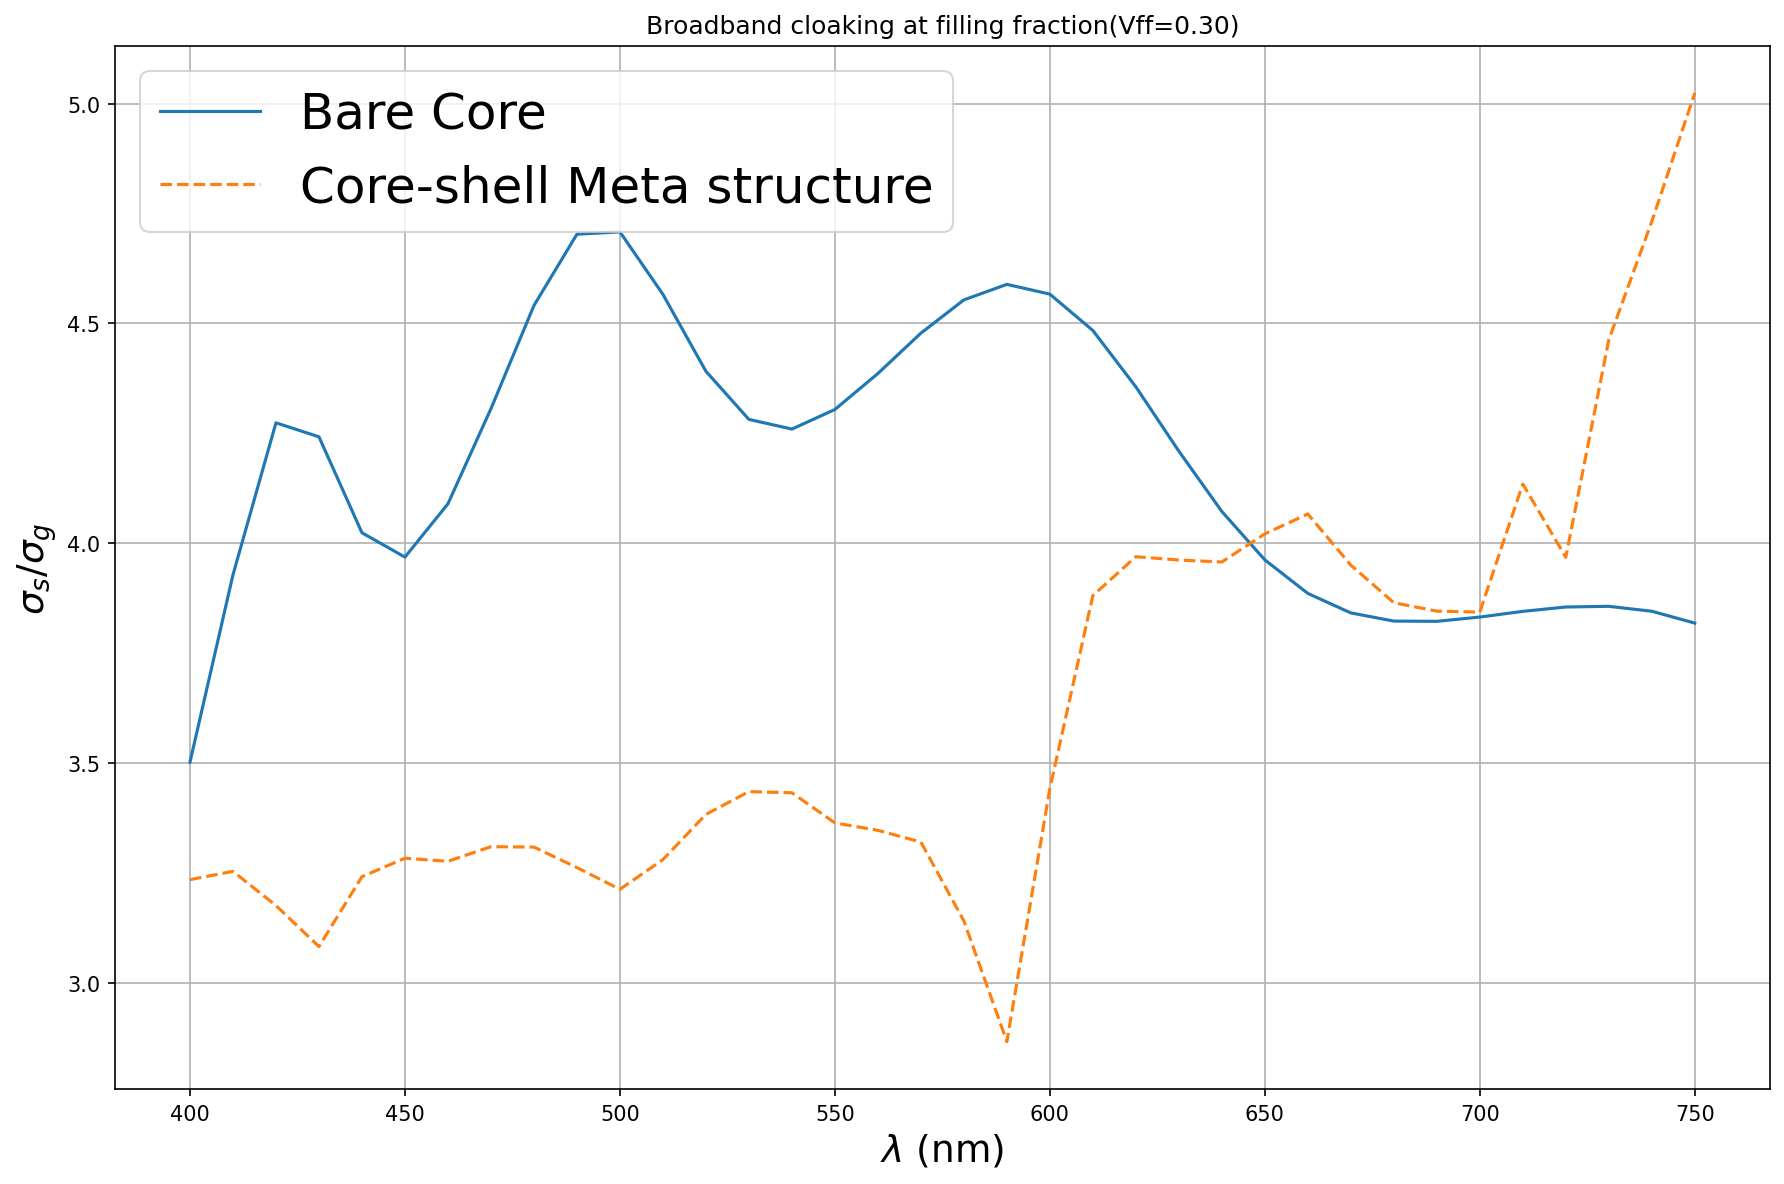

In [2]:

try:
# --- Refractive index data source --- 
  Refractive_index_data = 'data/optical_constants/20nm_gold_film_silica.csv'
  Raw_data = open(Refractive_index_data,'rt')
  data = np.loadtxt(Raw_data,delimiter=",") # processed data 
  Wavelength = np.asarray(data[:,0]) 
  NPRefndx  = np.asarray(data[:,1])  
  NPExtinction  = np.asarray(data[:,2]) 
  Silica_refndx = data[:,3] 
  #--- parameters --- 
  nb = 1.0 # Background refractive index
  CoreDia = 690.0 # size in nm
  a0 = CoreDia/2
  NPDia = 20.0 # size in np
  R = NPDia / 2 #radius of plasmonic NP
  Vff = 0.30 # NP filling fraction
  M = 512 # number of MSF points

  #Compute the geometric cross-section
  σ_g = np.pi * a0 ** 2 # bare core
  σ_g_cs = np.pi * (a0+NPDia*3) ** 2 # core-shell
  # Set refractive index 
  k0 = nb # Refractive index exterior or the background
  #Compute the MFS points

  ν, ρ_bdy, ρ_int, ρ_ext = Mfs.ComputeMFSPoints( a0, M )

  # Generate the point scatteres positions

  R_N = Geometry.Coordinates(CoreDia, NPDia, Vff)

  # allocate memory for the total cross-sections

  σ_t0 = np.full( ( len(Wavelength), 1 ), 'nan', dtype = 'float' )
  σ_s  = np.full( ( len(Wavelength), 1 ), 'nan', dtype = 'float' )

  N = len(R_N) # number of nanoparticles in the shell volume

  """
  --- To simulate without a tqdm or a progress bar please comment the first for loop,
      and uncomnent the second for loop.
  """
  # --- save result---
  save_fig = "results/figures/scattering_suppression.png"
  result_filename = f'results/data/Broadband_scattering_suppression_Vff_{Vff:0.2f}.csv'

  for i in tqdm(range(len(Wavelength)),desc="Computing Scattering cross-section"):
  #for i in range(len(Wavelength)):
    WL = Wavelength[i]
    n = NPRefndx[i]
    K = NPExtinction[i]
    α = Geometry.RayleighAlpha(R, WL, n, K)
    k0 = (2*np.pi/WL)*nb 
    k1 = (2*np.pi/WL)*Silica_refndx[i]
    
  #Compute the MFS results for a Bare core and a core-shell plasmonic meta structure

    σ_t0[i] = Mfs.ComputeTotalCrossSectionMFS( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, M )
    σ_s[i]  = Mfs.ComputeTotalCrossSection( k0, k1, a0, ν, ρ_bdy, ρ_int, ρ_ext, α, R_N, M, N )  

  # Normalized suppression data into dataframe
  cloak_data = pd.DataFrame({'Wavelength':Wavelength,
                            'Bare_core':(σ_t0 / σ_g).flatten(),
                            'Core_shell': (σ_s / σ_g).flatten()
                            })
  # Save results as CSV files
  os.makedirs('results', exist_ok=True)
  cloak_data.to_csv(result_filename,index=False, float_format='%.6f')
  print("Scattering suppression data saved at:",result_filename)

  #plot the results
  #Path("figures").mkdir(parents=True, exist_ok=True)
  plt.figure(figsize=(12,8))
  plt.plot( Wavelength, σ_t0 / σ_g, Wavelength, σ_s / σ_g , '--'  )
  plt.xlabel( r'$\lambda$ (nm)', fontsize = 18 )
  plt.ylabel( r'$\sigma_{s}/\sigma_{g}$', fontsize = 18 )
  plt.title(f"Broadband cloaking at filling fraction(Vff={Vff:0.2f})")
  plt.legend( ( 'Bare Core', 'Core-shell Meta structure' ),  fontsize = 24 )
  plt.grid()
  plt.tight_layout()
  plt.savefig(save_fig, dpi=100)
  print(f"Saved: {save_fig}")
except Exception as e:
    print("error occured:",e)


## Conclusion — Key Points

- **Computational platform**
  - Models plasmonic cloaks made of a dielectric core surrounded by an AuNP shell.
  - Uses **fundamental optical quantities** (AuNP scattering/absorption cross sections, core material properties).

- **Methodology**
  - **Core:** Method of Fundamental Solutions (MFS) for scattering by the core.
  - **Shell (AuNPs):** Foldy–Lax theory for **multiple scattering** among nanoparticles.
  - **Coupling:** Explicitly accounts for **strong interactions** between the core and the AuNP shell—critical for **multi-layer** nanoparticle coverings.

- **Scope & limitations**
  - Employs a **scalar approximation** and a **point-scatterer** model for AuNPs.
  - Despite these simplifications, the framework is a **useful tool** for studying **broadband 3D** plasmonic cloaking.

- **Key findings**
  - **Feasibility in the visible:** Plasmonic AuNPs can be configured to **suppress scattering** across a **broad spectral range** in the visible.
  - **Mesoscale cores cloaked:** Robust cloaking demonstrated for **silica cores up to ~900 nm**—**larger than the operating wavelength**.
  - **Scales without extra layers:** As core size increases, effective cloaking is achieved **without adding more AuNP layers**—i.e., **suppression at a constant filling fraction**.

**TL;DR:** A coupled MFS + Foldy–Lax platform (with scalar/point-scatterer assumptions) shows that disordered AuNP shells can robustly cloak mesoscale dielectric cores across the visible, including ~900 nm diameters, and do so without increasing shell layering when **f** is held constant.
